# Multiclass Classification

Several classifiers are natively multi-class prediction: K-nearest neighbhors, Naive Bayes, Decision Trees and Random Forests, Support Vector Machines, neural networks.


We will practice with the MNIST data set. It is a data sets of images of handwritten numbers. We will practice the case to predict multiple classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### a. Explore the data 

The ``data`` is a vector of floats. The ``target`` is an integer that is the attribute or label of the data.

Explore the data and its attribute. What is the data type, how much data is there?



In [2]:
data,y = digits["data"].copy(),digits["target"].copy()

# answer velow

* What are the labels and how many classes are there? hint: use the function ``np.unique()``.

In [3]:
Nclasses = len(np.unique(y))
print(np.unique(y))
print(Nclasses)

[0 1 2 3 4 5 6 7 8 9]
10


We can look at the distribution of the sample with respect to the classes.

Are the classes balanced?

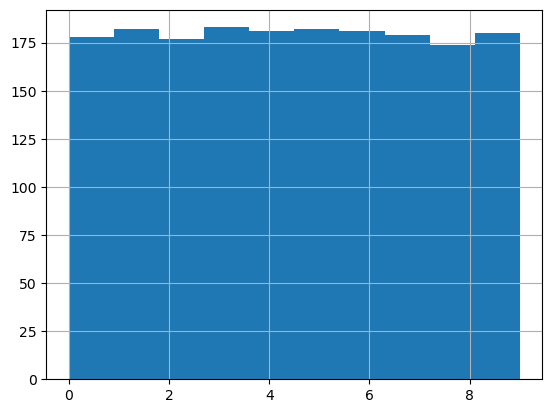

In [4]:
plt.hist(y);plt.grid(True)

### b. Data preparation
First print and plot the data.

In [ ]:
# plot the data
# plot the first 4 data and their labels.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### c. Data re-scaling

We could use MinMaxScaler from ``sklearn.preprocessing`` but since the formula for that is (x-min)/(max-min) and our min is 0, we could directly calculate x/max.

The raw data is still stored in the dictionary ``digits`` and so we can modify the ``data`` variable in place.

Additional tutorials [here](!https://www.kaggle.com/recepinanc/mnist-classification-sklearn).


In [ ]:
print(min(data[0]),max(data[0]))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(newdata))
print(newdata)

### d. Train-test split

In [ ]:
# Split data into 50% train and 50% test subsets
from sklearn.model_selection import train_test_split
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, shuffle=False)


Now we will use several classifiers.

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine classifier
clf = SVC(gamma=0.001) # model design
clf.fit(X_train, y_train) # learn
svc_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# K-nearest Neighbors
knn_clf = KNeighborsClassifier() # model design
knn_clf.fit(X_train, y_train) # learn
knn_prediction = knn_clf.predict(X_test) # predict on test
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))

# Random Forest
rf_clf = RandomForestClassifier(random_state=42, verbose=True) # model design
rf_clf.fit(X_train, y_train)# learn
rf_prediction = rf_clf.predict(X_test) # predict on test
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=rf_prediction))

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, rf_prediction):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print("Support Vector Machine")
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, svc_prediction)}\n")
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print("K-nearest neighbors")
print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test, knn_prediction)}\n")
disp = metrics.plot_confusion_matrix(knn_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
print("Random Forest")
print(f"Classification report for classifier {rf_clf}:\n"
      f"{metrics.classification_report(y_test, rf_prediction)}\n")
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

In [ ]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm

from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot of a ROC curve for a specific class
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
for i in range(Nclasses):
    plt.plot(fpr[i], tpr[i], label='ROC label %1.0f (area = %0.2f)' % (i,roc_auc[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf,X_train,y_train,cv=3) # predict using K-fold cross validation